In [77]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [78]:
class KNearestNeighbors:
    def __init__(self, k):
        self.k = k
        
    def fit(self, X_train, Y_train):
        self.X_train = X_train
        self.Y_train = Y_train
        self.number_class = len(np.unique(Y_train))
        
    def nearestNeighbors(self, X_test):
        distance = np.sqrt(np.sum((X_test - self.X_train)**2, axis = 1))
        near_neighbor = np.argsort(distance)[0:self.k]
        return near_neighbor
    
    def predict(self, X_test):
        near_neighbor = self.nearestNeighbors(X_test)
        y = np.argmax(np.bincount(self.Y_train[near_neighbor]))
        return y
    
    def evaluate(self, X_test, Y_test):
        self.X_test = X_test
        self.Y_test = Y_test
        y_predict=np.zeros(len(self.X_test))
        for i, test in enumerate(self.X_test):
            y_predict[i] = self.predict(test)
        evaluatation = (y_predict == self.Y_test).sum()/len(self.Y_test)
        return evaluatation

In [79]:
iris = load_iris()

In [80]:
X = iris['data']
Y = iris['target']

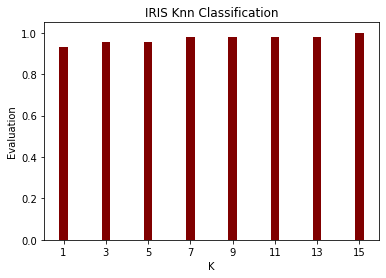

In [81]:
eval = []
for K in range(1, 17, 2):
    knn = KNearestNeighbors(k=K)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=5)
    knn.fit(X_train,Y_train)
    evaluation = knn.evaluate(X_test, Y_test)
    eval.append(evaluation)

plt.bar(np.arange(1,17,2), eval, color ='maroon', width = 0.4)

plt.xlabel("K")
plt.ylabel("Evaluation")
plt.title("IRIS Knn Classification")
plt.xticks(np.arange(1,17,2))
plt.show()

In [82]:
from sklearn.neighbors import KNeighborsClassifier

eval2=[]
for K in range(1, 17, 2):
    knc=KNeighborsClassifier(n_neighbors=K)
    knc.fit(X_train,Y_train)
    prediction=knc.predict(X_test)
    evaluatation = (prediction == Y_test).sum()/len(Y_test)
    eval2.append(evaluatation)

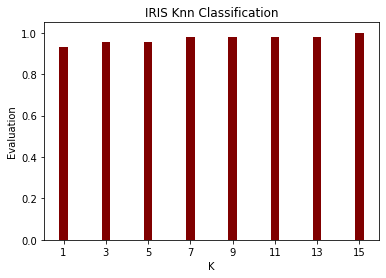

In [83]:
plt.bar(np.arange(1,17,2), eval2, color ='maroon', width = 0.4)

plt.xlabel("K")
plt.ylabel("Evaluation")
plt.title("IRIS Knn Classification")
plt.xticks(np.arange(1,17,2))
plt.show()